# ezplot Tutorial
Welcome to the Plot-Hero package documentation! This package provides an easy-to-use function, plot_histogram, for creating beautiful visualizations of your data. Here, we’ll walk through the functionality with a fun, real-life example starring Alex, a budding data scientist on a quest to uncover insights in marketing data.

### Alex's Data Visualization Quest
Alex, an intern at a marketing firm, was tasked with analyzing campaign data to understand what works and what doesn’t. However, Alex knew that numbers alone weren’t enough—they needed visualizations to make their insights shine. That’s where Plot-Hero came to the rescue with the mighty plot_histogram function!

### Step 1: Setup
Alex began their journey by loading the marketing dataset, which contained details about campaign types, success rates, and even the channels used to target specific audiences.

In [1]:
import dsci_524_ezplot

print(dsci_524_ezplot.__version__)

0.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dsci_524_ezplot.plot_histogram import plot_histogram
from dsci_524_ezplot.plot_line import plot_line

In [3]:
data = pd.read_csv("marketing_campaign_dataset.csv")
data.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


### Step 2: Plotting a Histogram for a Numerical Column
Alex's first task was to understand the distribution of Conversion_Rate to show the distribution of conversion rates across campaigns.

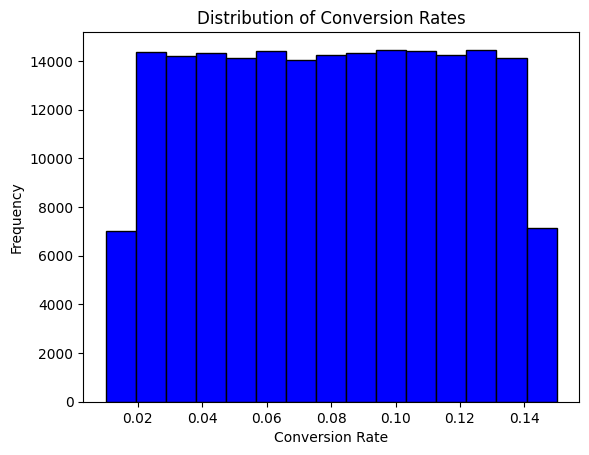

In [4]:
fig, ax = plot_histogram (
    df=data,
    column="Conversion_Rate",
    bins=15,
    title="Distribution of Conversion Rates",
    xlabel="Conversion Rate",
    ylabel="Frequency",
    color="blue"
)
plt.show()

The plot highlights the conversion rates of campaigns in bins. Alex can now point out patterns, such as campaigns never achieves conversion rates above 0.16 and anything above 0.08 is better than average.

### Step 3: Plotting a Bar Plot for a Categorical Column
Next, Alex turned their attention to the Channel_Used column to see which platforms marketers favored. Since this column was categorical, Alex used plot_histogram to create a bar plot:

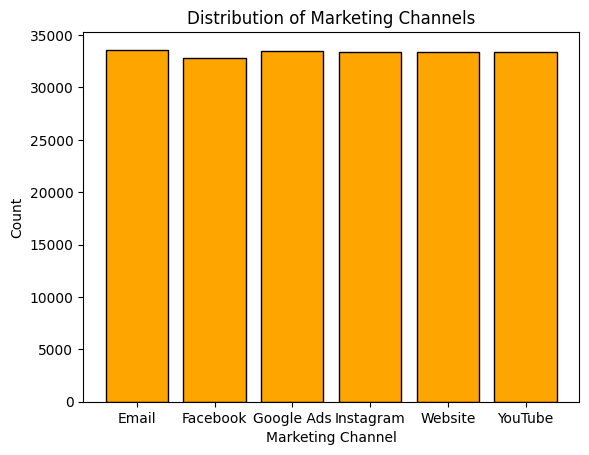

In [5]:
fig, ax = plot_histogram(
    df=data,
    column="Channel_Used",
    title="Distribution of Marketing Channels",
    xlabel="Marketing Channel",
    ylabel="Count",
    color="orange"
)
plt.show()


The plot clearly shows the distribution of marketing channels, with each bar representing the count of campaigns run on different platforms. It's evident that platforms like YouTube, Google Ads, and others are used equally often in the dataset.

### Step 4: Tracking Campaign Performance Over Time
Alex wanted to analyze how campaign performance changed over time. The plot_line function was perfect for visualizing this temporal trend.

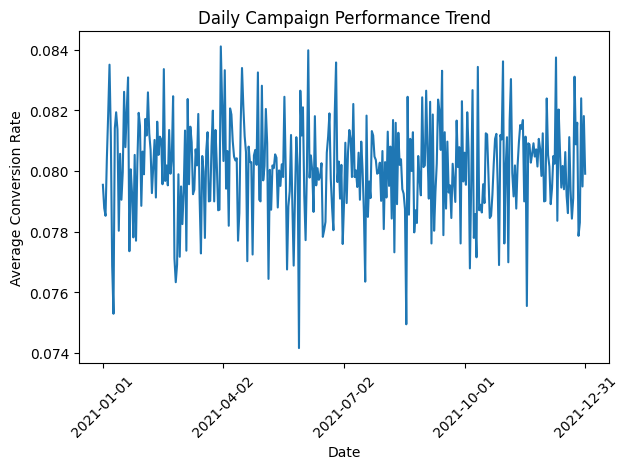

In [6]:
daily_performance = data.groupby('Date')['Conversion_Rate'].mean().reset_index()
daily_performance['Date'] = pd.to_datetime(daily_performance['Date'])
daily_performance['Date_Numeric'] = (daily_performance['Date'] - pd.Timestamp('1970-01-01')).dt.days

fig, ax = plot_line(
    df=daily_performance,
    x="Date_Numeric",
    y="Conversion_Rate",
    title="Daily Campaign Performance Trend",
    xlabel="Date",
    ylabel="Average Conversion Rate"
)

n_ticks = 5
step = len(daily_performance) // (n_ticks - 1)
tick_indices = range(0, len(daily_performance), step)
tick_positions = [daily_performance['Date_Numeric'].iloc[i] for i in tick_indices]
tick_labels = [daily_performance['Date'].iloc[i].strftime('%Y-%m-%d') for i in tick_indices]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alex noticed several interesting patterns in the campaign performance throughout 2021. The daily conversion rates showed consistent fluctuations between 7.6% and 8.4%, suggesting that while there was variability in campaign performance, it maintained a relatively stable range.

Alex was particularly intrigued by several notable features in the data:
- The highest peaks reached approximately 8.4% conversion rate, occurring multiple times throughout the year
- A significant dip appeared in early July, where the conversion rate dropped to about 7.4%
- Most campaigns maintained an average conversion rate around 8%

This visualization helped Alex identify both successful periods and areas for improvement. The consistent oscillation pattern suggested that external factors, such as seasonality or market conditions, might be influencing campaign performance. 